In [2]:
# Solving Equations

## Finding Roots of Polynomials
<a id='RootFinding'></a>
In a previous seminar we looked at fitting polynimal functions to data points. 



In [11]:
# Example data set with noise
x = np.linspace(-6, 10, 100)
y = (2*x**3-8*x**2-96*x)* np.random.random(size=x.shape)

[  0.82122349  -3.37433925 -39.01002903   6.32058128]


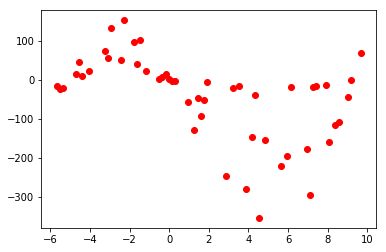

In [54]:
# Choose a random sample
x_sub, y_sub = zip(*random.sample(list(zip(x, y)), 50))

# Plot the data
plt.plot(x_sub, y_sub, 'ro')

# Find the coefficients of a polynomial curve fitted to the data
a = np.polyfit(x_sub, y_sub, 3)

# Generate the points of the curve for the given input data
yfit3 = a[0]*x**3 + a[1]*x**2 + a[2]*x + a[3]

print(a)

Many applications involve finding the roots of a function $f(x)$.

That is, we want to find a value or values for $x$ such that $f(x)=0$.

For some functions, the roots are easy to find analytically.
<br>For example, the function used to generate the data above is:

$f(x) = 2x^3 - 8x^2 - 96x$

As each term is divisible by $2x$, we can easily factorise this function to:

$f(x)=(2x)(x + 4)(x - 8)$

giving us roots as 0, -4, and 8.



After adding some noise to the data set, the derived function is not so strightforward.

We can use the functions `roots` to find the roots of a polynomial function.

In [55]:
r = np.roots(a)
print(r)

[ 9.18786196 -5.23884383  0.159899  ]


We can plot the polynomial equation and the roots to check the solution:

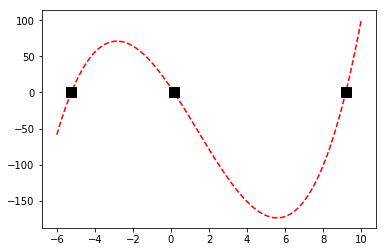

In [56]:
z = np.zeros(len(r))     
plt.plot(x, yfit3, 'r--')
plt.plot(r, z, 'ks', markersize=10)

`roots` ony works for polynomials, it does not work for any other nonlinear function.


For a polynomial function, we know that there will be many roots as the order of the function e.g. the cubic function above will have three roots.

It is easy to verify this visually from the plot above.

To count the number of roots in a function *computationally* we can:
- find the number of solutions if we are using `root` i.e. ```python len(r)```
- count the number of times that the sign changes in the interval.


#### Counting roots using sign changes.
If we multiply each pair of neightbouring elements together, wherever the product is a negative value, this indicates a sign change.

*(You only get a negative number from the product of a positive and negative number).*

In [57]:
print(np.sum(y[:-1] * y[1:] < 0))

3


##### What does this code do?
>`y[:-1] * y[1:]`

This gives us a new array with the product of each neighbouring pair.

<br>
>`y[:-1] * y[1:] < 0`

We then remove all non-negative values...

<br>
>`np.sum(y[:-1] * y[1:] < 0)`

...and finally count how many values are left.

## Solving Equations

## Systems of Coupled Equations
<a id='SystemsCoupledEquations'></a>
### Linear Equations
<a id='LinearEquations'></a>

__Example :__ Given the equations below, find $x_1$, $x_2$ and $x_3$.

\begin{align*}
x_1 - x_2 + x_3 &= 0\\
10x_2 + 25x_3 &= 90\\
20x_1 + 10x_2 &= 80\\
\end{align*}



We have three equations and three unknown values so we can solve the equations, for example using substitution or elimitaion.

A faster way to solve this problem is to use the function `solve` from the Numpy linear algebra module. 

First the values from the right-hand-side and the coefficients from the left-hand-side are arranged as Numpy arrays.



In [24]:
A = np.array([[1, -1, 1],
              [0, 10, 25],
              [20, 10, 0]])

B = np.array([0, 90, 80])


If you are familiar with matrices, this is equivalent to expressing the form: 

\begin{equation*}
\underbrace{
\begin{bmatrix}
1 & -1 & 1  \\
0 & 10 & 25 \\
20 & 10 & 0 \\
\end{bmatrix}
}_{\mathbf{A}}
\cdot
\underbrace{
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
}_{\mathbf{x}}
=\underbrace{
\begin{bmatrix}
0 \\
90 \\
80 \\
\end{bmatrix}
}_{\mathbf{B}}
\end{equation*}

Notice that B appears in code as a horizontal array.

In Python, 1D arrays are ALWAYS represented horizontally. 

The array is treated as a row or column vector depending on the equation in which it appears.

`solve` solves linear equations of the form `ax = b` for x.



In [44]:
x = np.linalg.solve(A, B)
print(x)


[2. 4. 2.]


$x_1 = 2$
<br>$x_2 = 4$
<br>$x_3 = 2$

To verify that this is correct, we can find the matrix product or dot product of $\mathbf{A}$ and $\mathbf{x}$. 

(see 02_DataStructures_LibraryFunctions.ipynb for the dot product)

In [45]:
print(np.dot(A,x))


[ 0. 90. 80.]


The solution matches the original equation, which we can confim in code:

In [46]:
print(np.dot(A,x) == B)


[ True  True  True]


Example engineering problems with systems of coupled linear equations:
 - the force distribution in a truss structure 
 - the electrical current flowing in and out of each node in a circuit.
<img src="img/truss.gif" alt="Drawing" style="width: 600px;"/> 

### Example: An Electrical Circuit
<a id='ExampleElectricalCircuit'></a>
In electrical systems, network theory is the study of how to solve circuit problems. 
<br>The voltage and current in a closed circuit obey two simple rules;  
- Kirchoff's current law (first law)
- Kirchhoff's voltage law (second law)
<img src="img/kirchhoffLaws.png" alt="Drawing" style="width: 300px;"/> 


#### Kichoff's Current Law

The algebraic sum of ALL the currents entering and leaving a junction must be equal to zero.

$\sum i_{in} - \sum i_{out} = 0 $


<img src="img/kirchhoffCurrentLaw.png" alt="Drawing" style="width: 200px;"/>

#### Kirchhoff's Voltage Law
For a closed loop series path the algebraic sum of all the *voltages* and *voltage drops* around any closed loop in a circuit is equal to zero.

$\sum E - \sum V = 0 $

<img src="img/kirchhoffVoltageLaw.png" alt="Drawing" style="width: 200px;"/> 


#### Electrical Elements Obey Ohm's Law 
The current through a conductor (I, units amps) is the voltage measured across the conductor (V, units volts) divided by the resistance (R, units Ohms).

$$V = IR$$


A Wheatstone bridge circuit is a very widely used circuit in scientific equipment.

<img src="img/Wheat4.png" alt="Drawing" style="width: 400px;"/> 




It is found in strain gauges, heart rate monitors, wind tunnels....etc.

Fundamentally, it is used to measure resistance.


<img src="img/Wheat1.png" alt="Drawing" style="width: 200px;"/> 

It has one voltage source, $E$.  

It has six branches with resistance: $R_1, R_2, R_3, R_4, R_5, R_6$.

__What is the current in each branch of the circuit?__



The circuit has:
 - 4 loops (A-D)
 - 4 nodes (a-d)
 

<img src="img/Wheat2.png" alt="Drawing" style="width: 400px;"/> 

 


We can use Kirchhoff's current law to equate the current flowing in and out of each node:

$\sum i_{in} - \sum i_{out} = 0 $

__Node a:__ &nbsp; $i_2 - i_4 - i_5 = 0$<br>
__Node b:__ &nbsp; $i_1 - i_2 - i_3 = 0$<br>
__Node c:__ &nbsp; $i_5 + i_6 - i_1 = 0$<br>
__Node d:__ &nbsp; $i_3 + i_4 - i_6 = 0$<br>

We can use Kirchoff's voltage law to equate the voltage and voltage drop in each loop: 
<br>$\sum V = \sum E$ 

__Loop A:__ &nbsp; $R_1 i_1 + R_2 i_2 + R_5 i_5 = E$<br>
__Loop B:__ &nbsp; $R_4 i_4 - R_5 i_5 + R_6 i_6 = 0$<br>
__Loop C:__ &nbsp; $R_2 i_2 - R_3 i_3 + R_4 i_4 = 0$<br>
__Loop D:__ &nbsp; $R_1 i_1 + R_2 i_2 + R_5 i_5 = E$

Where, $V=IR$ (Ohm's law)



We only need six equations to find the six unknown values $R_{1-6}$.

We can express the Loops A-C and Nodes a-c as coupled equations:
<br>$\sum E = \sum V = \sum iR$
<br>in the form:


\begin{equation*}
\underbrace{
\begin{bmatrix}
R_1 & R_2 & 0    & 0   &  R_5 & 0   \\
0   & 0   & 0    & R_4 & -R_5 & R_6 \\
0   & R_2 & -R_3 & R_4 &  0   & 0   \\
0   & 1   & 0    & -1  &  -1  & 0   \\
1   & -1  & -1   & 0   &  0   & 0   \\
-1  & 0   & 0    & 0   &  1   & 1   \\
\end{bmatrix}
}_{\mathbf{R}}
\cdot
\underbrace{
\begin{bmatrix}
i_1 \\
i_2 \\
i_3 \\
i_4 \\
i_5 \\
i_6 \\
\end{bmatrix}
}_{\mathbf{I}}
=\underbrace{
\begin{bmatrix}
E \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
}_{\mathbf{V}}
\end{equation*}

In [47]:
# Let's assign some values to our known variables:
R1, R2, R3, R4, R5, R6 = 300, 500, 1000, 500, 1000, 500
E = 5

# And create an array for R and V
R = np.array([[R1, R2,  0,   0,   R5, 0 ],
              [0,  0,   0,   R4, -R5, R6],
              [0,  R2, -R3,  R4,  0,  0 ], 
              [0,  1,   0,  -1,  -1,  0 ],
              [1, -1,  -1,   0,   0,  0 ],              
              [-1, 0,   0,   0,   1,  1]])

V = np.array([E, 0, 0, 0, 0, 0])



In [48]:
I = np.linalg.solve(R, V)
print(I)


[0.005 0.003 0.002 0.001 0.002 0.003]


Check your solution.
<br>The `@` symbol can be used as shorthand for `np.dot` to find the dot product. 

In [49]:
print(R @ I)
print(np.around(R @ I, 2))


[ 5.00000000e+00  0.00000000e+00  0.00000000e+00  1.30104261e-18
  2.16840434e-18 -2.16840434e-18]
[ 5.  0.  0.  0.  0. -0.]


This process is a fast and simple way to solve simultaneous linear equations, for example when compared to eilimination methods. 

##### Alternative Solution
We can find $\mathbf{I}$ by matrix multiplication:
\begin{align*}
\mathbf{R}\cdot\mathbf{I}&=\mathbf{V}\\
\end{align*}

but we have to rearrange the equation.

\begin{align*}
\mathbf{I}  &=\frac{\mathbf{V}}{\mathbf{R}}\\
            &=\mathbf{R^{-1}}\cdot\mathbf{V}\\
\end{align*}



The Numpy linear algebra module can be used to find the inverse of matrix $\mathbf{R}$.

In [50]:
R_inv = np.linalg.inv(R)

I = np.dot(R_inv, V)

print(I)


[0.005 0.003 0.002 0.001 0.002 0.003]


### Non-Linear Equations
<a id='NonLinearEquations'></a>
An example application of solving a coupled set of non-linear equations is finding the coefficients of a quadratic polynomial function, using three points that lie on the curve of the function.

The equation for a parabola is $y=ax^2+bx+c$, where $a$, $b$, and $c$ are constants.

The equation of a parabola can be fully defined using three points that lie on the curve (provided the curve is not a  straight line). 




Given three points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$,
<br>three simultaneous equation may be written: 
$$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$$



__Example__

Given that:
<br>$(x_1,y_1)=(-2,2)$ 
<br>$(x_2,y_2)=(1,-1)$ 
<br>$(x_3,y_3)=(4,4)$

find $a$,$b$ and $c$.


Hint: 
<br>Build a 1D array, `y`
<br>Build a 2D array, `x`






\begin{equation*}
\underbrace{
\begin{bmatrix}
-2^2 & -2 & 1  \\
1^2 & 1 & 1 \\
4^2 & 4 & 1 \\
\end{bmatrix}
}_{\mathbf{x}}
\cdot
\begin{bmatrix}
a \\
b \\
c \\
\end{bmatrix}
=\underbrace{
\begin{bmatrix}
2 \\
-1 \\
4 \\
\end{bmatrix}
}_{\mathbf{y}}
\end{equation*}

In [51]:
# 1D array, y
y = np.array([2, -1, 4])

# 2D array, x
x = np.array([[(-2**2), -2, 1],
              [(1**2),   1, 1],
              [(4**2),   4, 1]])

abc = np.linalg.solve(x, y)
print(abc)

[ 0.8        -2.33333333  0.53333333]


Another way to create matrix x without writing it out explicitly is to use:
- broadcasting
- the numpy function, `power()` (raises first argument to power of second)


In [10]:
xs = np.array([-2, 1, 4])
print(xs)
xs = xs.reshape((3,1))
print(xs)
power = np.array([2, 1, 0])
print(x)
x = np.power(xs, power)

[-2  1  4]
[[-2]
 [ 1]
 [ 4]]
[[ 4 -2  1]
 [ 1  1  1]
 [16  4  1]]


## Coupled Non-Linear Equations (continued)
<a id='CoupledNonLinearEquations'></a>
Finally, we can use the function `fsolve` to solve higher order equivalents to the coupled systems of linear equations we started at the beginning of today's class.

Consider the equations:

\begin{align*}
y &= x^2\\
y &= 8-x^2\\
\end{align*}


We need to setup a function that is equal to zero at the solution. 

\begin{align*}
0 &= y - x^2\\
0 &= y - 8-x^2\\
\end{align*}

We have two equations, so the function must return two values. 

There are two variables, so the argument to the function will be an array of values.

In [6]:
from scipy.optimize import fsolve

def objective(guess): 
    x, y = guess         # unpack the array into the arguments
    z1 = y - x**2        # first equation
    z2 = y - 8 + x**2    # second equation
    return [z1, z2]      # list of zeros



We can then use `fsolve` we did for root finding.

Again, we need an initial guess for the solution.

In [4]:
guess = [1, 1] # initial guesses
sol = fsolve(objective, guess)
print(sol)



[2. 4.]


The closeness of returned argument of the function `objective` to zero is evaluated by the solver.

There may be more than one solution:

## Symbolic Mathematics
Sometimes we want to express the solution in the form of a symbolic expression (rather than an exact solution).

The `Sympy` package is designed for symbolic mathematics. 

In [169]:
from sympy import solve, symbols, Symbol, Function, Eq, pprint 

### Symbolic Polynomials
To write a symbolic equation, we first create variables to store the symbols we want to use:

In [171]:
a, b, c, x = symbols('a, b, c, x')

We then write an equation, using the variable names.

$$f(x) = ax^2 + bx + c$$

In [172]:
f = a*x**2 + b*x + c

Let's *symbolically* find the roots of the function $f(x)$.

`sympy.solve()` works in the same way as `numpy.linalg.solve()` (07_RootFinding_CoupledEquations.ipynb) but for symbolic mathematics.

In [173]:
solution = solve(f, x)

print(solution)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


This equation takes the familar form of the __quadratic formula__ $$\frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

However, it is difficult to tell from the way it is written.



`sympy.pprint` (pretty print) makes the solution more readable:

In [174]:
from sympy import pprint

pprint(solution)
print(solution)

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦
[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


We can use `subs` to substitute in numerical values for the symbolic variables in the solution.

In this case, there are two solutions (returned as a list) so we address each index of the list by index:

In [29]:
A, B, C = -1, 2, 3

x0 = solution[0].subs([(a, A), 
                       (b, B), 
                       (c, C)])

x1 = solution[1].subs([(a, A), 
                       (b, B), 
                       (c, C)])

display(x0, x1) 



-1

3

In [5]:
guess = [-1, -1]  # initial guesses
sol = fsolve(objective, guess)
print(sol)



[-2.  4.]


<a id='Summary'></a>
# Summary
- `numpy.linalg.solve()` : solutions to coupled linear and non-linear equations.
- `numpy.roots()` : roots of a polynomial function.
- `scipy.optimize.fsolve()` can also be used to solve couple nonlinear equations.

<a id='TestYourselfExercises'></a>
# Test-Yourself Exercises

Compete the Test-Youself exercises below.

Save your answers as .py files and email them to:
<br>philamore.hemma.5s@kyoto-u.ac.jp

## Test-Yourself Exercise : <a name="back1"></a>Fitting a wave
Consider the following four measurements of quantity $y$ at time $t$: 
<br>$(t_0,y_0)=(0,3)$
<br>$(t_1,y_1)=(0.25,1)$
<br>$(t_2,y_2)=(0.5,-3)$
<br>$(t_3,y_3)=(0.75,1)$. 

The measurements are part of a wave with the equation:

$y = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

where $a$, $b$, $c$, and $d$ are unknown constants. 

1. Build a system of four linear equations and solve for the four parameters. 

1. Creates a plot of the wave for $t$ going from 0 to 1 and show the four measurements with dots.

a,b,c,d:  [ 1.  2.  1. -1.]


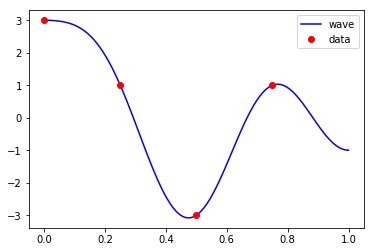

In [73]:
# Example Solution
tp = np.array([0, 0.25, 0.5, 0.75])
yp = np.array([ 3, 1, -3, 1])
A = np.zeros((4, 4))
rhs = np.zeros(4)
for i in range(4):
    A[i] = np.cos(1 * np.pi * tp[i]), np.cos(2 * np.pi * tp[i]), \
           np.cos(3 * np.pi * tp[i]), np.cos(4 * np.pi * tp[i])  # Store one row at a time
    rhs[i] = yp[i]
sol = np.linalg.solve(A, rhs)
print('a,b,c,d: ',sol)

t = np.linspace(0, 1, 100)
y = sol[0] * np.cos(1 * np.pi * t) + sol[1] * np.cos(2 * np.pi * t) + \
    sol[2] * np.cos(3 * np.pi * t) + sol[3] * np.cos(4 * np.pi * t)
plt.plot(t, y, 'b', label='wave')
plt.plot(tp, yp, 'ro', label='data')
plt.legend(loc='best');

## Test-Yourself Exercise : Root Finding

1. Estimate the root of the function $f(x) = 2\sin^2 x - 3\sin x + 1$:
<br> &nbsp; &nbsp; &nbsp; (i) between 0 and $\frac{\pi}{6}$
<br> &nbsp; &nbsp; &nbsp; (ii) between 1.5 and 2
<br> &nbsp; &nbsp; &nbsp; (iii) between $\frac{3}{4}\pi$ and $\pi$

1. Estimate the root of the function $3cos(x + 1.4)$
<br> &nbsp; &nbsp; &nbsp; (i) between 10 and 15
<br> &nbsp; &nbsp; &nbsp; (ii) between 20 and 25

In [74]:
# Example solution


### Test Yourself-Exercise : Root Finding

Find the roots of the function.

i.e. find all $x$ where $f(x)=0$

$$f(x)= ax^3 - bx^2 - ax + b$$

Use the values $a=3, b=1$ to find the exact vaue of the roots.